In this Notebook, I will be working on a cleaning data project. I will use the dataset provided by Airbnb for the Kaggle Challenge that occured two years ago. Here the [6 files provided](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data).

## Understanding the Data

In [1]:
#import pandas library to read csv files
import pandas as pd
import numpy as np

In [43]:
#import train csv file
train_data = pd.read_csv("train_users_2.csv")
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Let's see how many columns and the type of each.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


As you can see, our train dataset contains **16 columns** and **213451 entries/rows**.<br>
We also notice that some columns contain missing values, like: ***date_first_booking***, ***age*** and ***first_affiliate_tracked ***. <br>
What about the test data?

In [6]:
#import test csv file
test_data = pd.read_csv("test_users.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


First, the test data contains only 15 columns because ***country_destination*** is our dependant variable (the one we have to predict). Also, like the train data, it contains some missing values.

Now, after understanding our data. We move to cleaning it.

## Cleaning the data

As we found that there are missing values in some columns, we need to deal with these values in order to be able to apply machine learning algorithms. Let's start by concatenating train data and test data so that cleaning is performed on both.

In [44]:
# Merge train and test data
users_data = pd.concat((train_data,test_data),axis=0,ignore_index=True)

In [39]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 33.6+ MB


### Clean the Age column

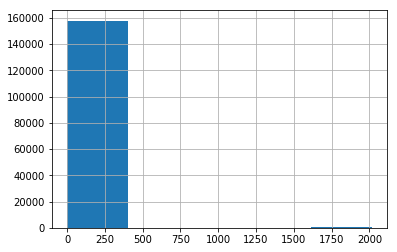

In [45]:
#plot the histogram of age column to get an idea about the distribution of values
users_data['age'].hist(bins=5)

There are some wrong values or incomplete values for the age, as we find that there is age numbers between 1600 and 2000. We can consider that they represent the year of birth, but it cannot be more than 100 years from now. Also there is numbers > than 100.

In [28]:
# Remove outliers function
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<min_val, col_values>max_val), np.NaN, col_values)
    return df

In [46]:
# Fixing age column
print("Fixing age column...")
users_data = remove_outliers(df=users_data, column='age', min_val=15, max_val=90)
users_data['age'].fillna(-1, inplace=True)

Fixing age column...


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [47]:
users_data.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


When looking at timestamp_first_active which is a datetime value, we find that it's a number and not in correct format of a datetime, so we need to fix it.

### Clean the Timestamp column

In [48]:
users_data['timestamp_first_active'] = pd.to_datetime(users_data['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [49]:
users_data.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


As we also have ***date_account_created*** containing empty values, we will replace these values by those of ***timestamp_first_active***. 

In [50]:
users_data['date_account_created'].fillna(users_data.timestamp_first_active, inplace=True)

In [53]:
# change th date_account_created format to contain only date
users_data['date_account_created'] = pd.to_datetime(users_data['date_account_created'], format='%Y-%m-%d')

Next, we will remove the column ***date_first_booking*** because the entries for this column are all empty in the test data, since it's only filled for those who made their first booking which is not the case with test set. Also, it may mislead the training because it may predict country_destination = NDF for all those who don't have a date of first booking.

In [51]:
users_data.drop('date_first_booking',axis=1, inplace=True)

In [52]:
users_data.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


### Fill additional columns with missing values

As we mentioned when we loaded the data, there is one another column that holds missing values: ***first_affiliate_tracked***. So let's deal with it.

In [54]:
users_data['first_affiliate_tracked'].fillna(-1, inplace=True)

In [55]:
users_data.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05
